# Import Libraries

In [210]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common Imports
import os
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig as save_fig
%matplotlib inline
from collections import Counter
import pathlib
import random

import warnings
warnings.filterwarnings("ignore")

# Text Preprocessing
import re, string, unicodedata
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import SnowballStemmer
from string import punctuation

from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# For Model
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, GlobalAveragePooling1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import AveragePooling1D, MaxPooling1D, Conv1D
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split

# Imaging
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Evaluate Regression Models
from sklearn.metrics import accuracy_score, classification_report

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

In [91]:
# Checking Tensorflow version
tf.__version__

'2.9.1'

In [92]:
# Checking Keras version
keras.__version__

'2.9.0'

# Data Loading

In [93]:
# Data Loading & Data Head
data = pd.read_csv('maps_data_with_target.csv')
data.head()

,Unnamed: 0,name,type,subtypes,city,latitude,longitude,rating,reviews,photo,street_view,description,owner_title,target
0,0,Lovina Beach,Beach,Beach,NaN,-8.161141,115.024357,4.4,766.0,https://lh5.googleusercontent.com/p/AF1QipOjQx...,https://lh5.googleusercontent.com/p/AF1QipP_7b...,"Volcanic-sand beach for diving & snorkeling, f...",NaN,Sea
1,1,Biaung Beach,Beach,Beach,Denpasar City,-8.652684,115.270419,4.2,515.0,https://lh5.googleusercontent.com/p/AF1QipN0uW...,https://lh5.googleusercontent.com/p/AF1QipN0uW...,NaN,NaN,Sea
2,2,Pantai Segara Ayu,Beach,Beach,Denpasar City,-8.682463,115.264300,4.5,1727.0,https://lh5.googleusercontent.com/p/AF1QipPP-M...,https://lh5.googleusercontent.com/p/AF1QipPP-M...,NaN,NaN,Sea
3,3,Sanur,Beach,Beach,NaN,-8.707178,115.262624,4.5,4395.0,https://lh5.googleusercontent.com/p/AF1QipM5xr...,https://lh5.googleusercontent.com/p/AF1QipM5xr...,Colorful fishing boats dot beaches of this res...,NaN,Sea
4,4,Werdhapura Beach,Beach,Beach,Denpasar City,-8.691375,115.266540,4.3,173.0,https://lh5.googleusercontent.com/p/AF1QipO-hm...,https://lh5.googleusercontent.com/p/AF1QipO-hm...,NaN,NaN,Sea


In [94]:
# Data Tail

data.tail()

,Unnamed: 0,name,type,subtypes,city,latitude,longitude,rating,reviews,photo,street_view,description,owner_title,target
547,547,Volcano guest house and warung,Lodge,Lodge,Bangli Regency,-8.249021,115.401085,4.2,166.0,https://lh5.googleusercontent.com/p/AF1QipOjyX...,https://lh5.googleusercontent.com/p/AF1QipOjyX...,NaN,Volcano guest house and warung,Forest
548,548,Batukaru Coffee Estate,Lodge,Lodge,Tabanan Regency,-8.351960,115.119365,4.7,63.0,//lh4.googleusercontent.com/proxy/7BZ1-LbZD6wB...,//lh4.googleusercontent.com/proxy/7BZ1-LbZD6wB...,NaN,Batukaru Coffee Estate,Forest
549,549,Pondok Wisata Grya Sari Hotel,Hotel,"Hotel, Restaurant",Buleleng Regency,-8.208885,114.965623,4.0,59.0,https://lh5.googleusercontent.com/p/AF1QipO9_N...,https://lh5.googleusercontent.com/p/AF1QipO9_N...,NaN,Pondok Wisata Grya Sari Hotel,Forest
550,550,"Mandapa, a Ritz-Carlton Reserve",Hotel,"Hotel, Meeting planning service, Wedding venue",Gianyar Regency,-8.485686,115.245633,4.7,1177.0,https://lh5.googleusercontent.com/p/AF1QipNbly...,https://lh5.googleusercontent.com/p/AF1QipNbly...,Upscale riverside resort offering a hip bamboo...,"Mandapa, a Ritz-Carlton Reserve",Forest
551,551,Villa Campuhan,Hotel,"Hotel, Villa",Karangasem Regency,-8.475514,115.625671,4.5,85.0,//lh3.googleusercontent.com/proxy/Md4l2CjVw_03...,//lh3.googleusercontent.com/proxy/Md4l2CjVw_03...,NaN,Villa Campuhan,Sea


In [95]:
# Copy data original

data_copy = data.copy()

# Data Cleaning

### Drop Unuseful Variable

In [96]:
# We will not use "Unnamed: 0" for analysis, so we will delete it
data.drop('Unnamed: 0', axis = 1, inplace = True)

### Data Shape (Num of Rows and Columns) & Data Type

In [97]:
# Shape Data
print("Data Shape : ", data.shape)

Data Shape :  (552, 13)


In [98]:
# Check Dataset columns type, missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         552 non-null    object 
 1   type         552 non-null    object 
 2   subtypes     552 non-null    object 
 3   city         545 non-null    object 
 4   latitude     552 non-null    float64
 5   longitude    552 non-null    float64
 6   rating       473 non-null    float64
 7   reviews      473 non-null    float64
 8   photo        519 non-null    object 
 9   street_view  519 non-null    object 
 10  description  100 non-null    object 
 11  owner_title  528 non-null    object 
 12  target       552 non-null    object 
dtypes: float64(4), object(9)
memory usage: 56.2+ KB


This dataset has missing values, *RangeIndex* from 0 to 551, its type of data type are float and object.

# Exploratory Data Analysis

## General Exploratory

### Check imbalance data target

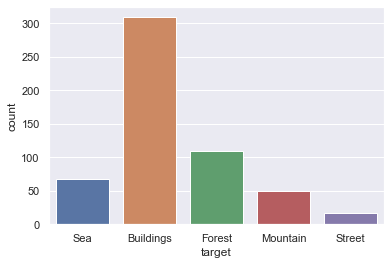

In [247]:
# plot imbalance on target class
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="target", data = data)

Here, as it can be seen, the data is imbalance.

### Explore the Categorical Features

In [99]:
# initialize categorical_features
categorical_features = [feature for feature in data.columns if ((data[feature].dtypes=='O') & (feature not in ['fraudulent']))]

# length each feature
for feature in categorical_features:
    print('This {} feature has {} values'.format(feature,len(data[feature].unique())))

print("Len of categorical features :",len(categorical_features))

This name feature has 552 values
This type feature has 126 values
This subtypes feature has 215 values
This city feature has 18 values
This photo feature has 520 values
This street_view feature has 520 values
This description feature has 101 values
This owner_title feature has 529 values
This target feature has 5 values
Len of categorical features : 9


In [100]:
# list of numerical variables
numerical_features = data.select_dtypes(exclude='object').columns
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  4


,latitude,longitude,rating,reviews
0,-8.161141,115.024357,4.4,766.0
1,-8.652684,115.270419,4.2,515.0
2,-8.682463,115.264300,4.5,1727.0
3,-8.707178,115.262624,4.5,4395.0
4,-8.691375,115.266540,4.3,173.0


### Numerical Features Distribution and Anomaly

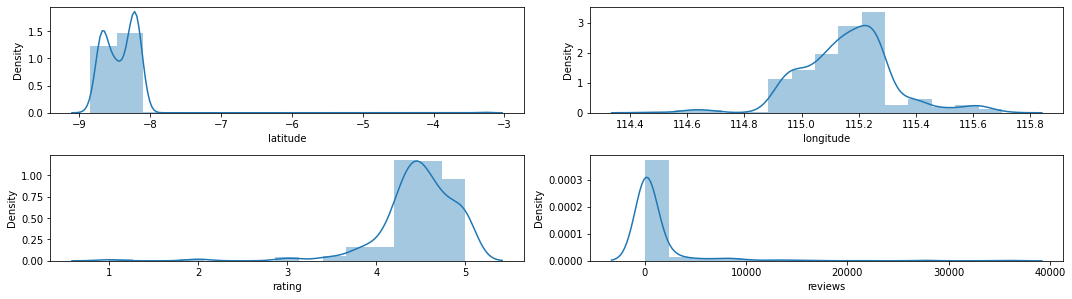

In [101]:
# Visualizing data distribution with distplot 
x = plt.figure(figsize=(15, 10))

for i, j in enumerate(numerical_features):
    x.add_subplot(5, 2, i+1)
    sns.distplot(data[j], bins=15)
    x.tight_layout()

plt.tight_layout()

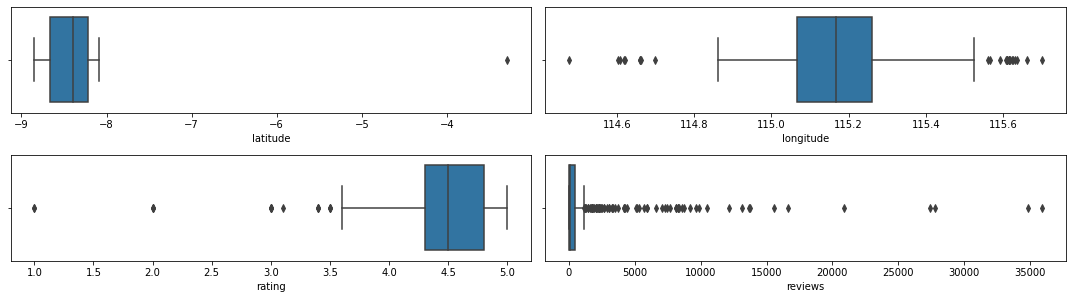

In [102]:
# Visualizing data distribution with boxplot // checking outliers
x = plt.figure(figsize=(15, 10))
for i, j in enumerate(numerical_features):
    x.add_subplot(5, 2, i+1)
    sns.boxplot(data[j])
    x.tight_layout()
plt.tight_layout()

###  Relation between Numerical Features and Target Feature

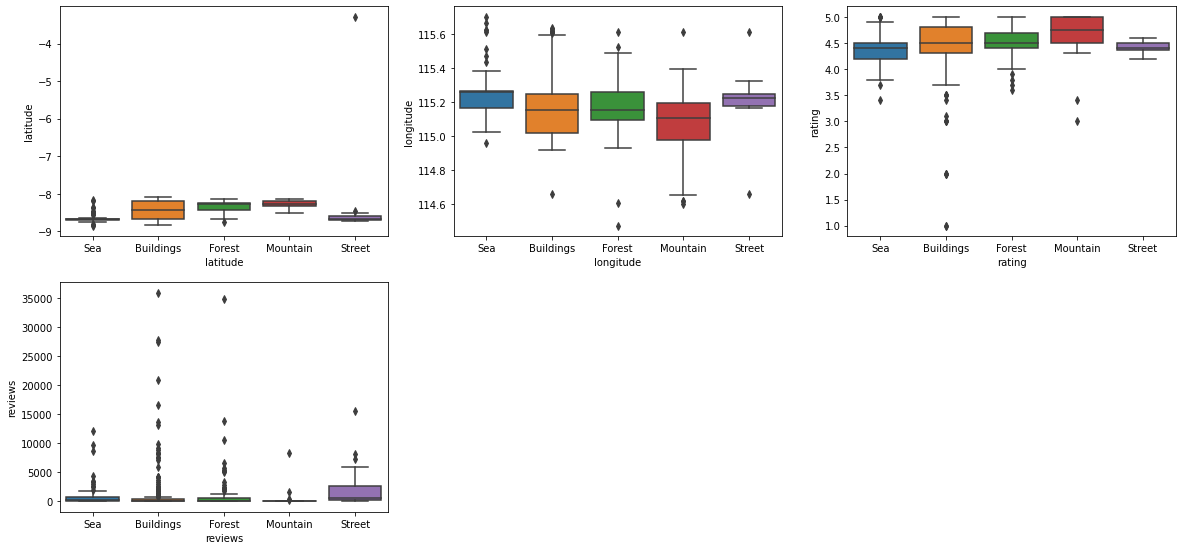

In [103]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1
for feature in numerical_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(x = "target", y = data[feature], data = data)
    plt.xlabel(feature)
    plotnumber += 1
plt.show()

### Correlation between Numerical Features

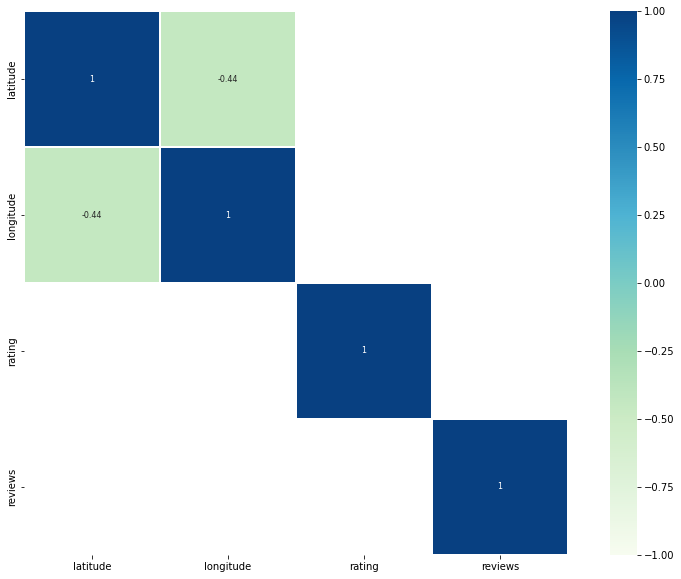

In [104]:
# Checking for correlation by heatmap
corr = data[numerical_features].corr() 
plt.figure(figsize=(15, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='GnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## Text Exploratory

In [105]:
# we will fill nan values with space before we do the exploration
data.fillna(" ",inplace = True)

In [106]:
# Merging all object variables except the variables with link to website
data['text'] = data['name'] + ' ' + data['type'] + ' ' + data['subtypes'] + ' ' + data['description'] + ' ' + data['owner_title']
data['text'][0]

'Lovina Beach Beach Beach Volcanic-sand beach for diving & snorkeling, featuring regular visits from bottle-nosed dolphins.  '

In [107]:
# initialize new dataframe from original data with only text and target variable
datax = data.copy()
del datax['name']
del datax['type']
del datax['subtypes']
del datax['city']
del datax['latitude']
del datax['longitude']
del datax['rating']
del datax['reviews']
del datax['photo']
del datax['street_view']
del datax['description']
del datax['owner_title']

In [108]:
datax.head()

,target,text
0,Sea,Lovina Beach Beach Beach Volcanic-sand beach f...
1,Sea,Biaung Beach Beach Beach
2,Sea,Pantai Segara Ayu Beach Beach
3,Sea,Sanur Beach Beach Colorful fishing boats dot b...
4,Sea,Werdhapura Beach Beach Beach


In [109]:
# filtering
sea_post = datax[datax['target'] == 'Sea']
buildings_post = datax[datax['target'] == 'Buildings']
forest_post = datax[datax['target'] == 'Forest']
mountain_post = datax[datax['target'] == 'Mountain']
street_post = datax[datax['target'] == 'Street']


### Wordclouds

In [110]:
# Defining function wor wordcloud
def show_wordcloud(data, name):
    # Collecting all words in the description
    joineddata = " ".join(desc for desc in data.text)
    print ("There are {} words in the combination of all {} place description.".format(len(joineddata), name))
    
    # Generate wordcloud
    wordcloud = WordCloud(background_color='white',
                    stopwords = set(STOPWORDS),
                    max_words = 1000,
                    random_state = 42,
                    width=1000, 
                    height=500)
    wordcloud.generate(joineddata)

    # display the word cloud
    plt.figure(figsize = (15,10), facecolor = 'white')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'"Wordcloud of {name} place description"', fontsize = 15)
    plt.show()

#### *Wordcloud of sea class*

There are 6593 words in the combination of all sea place description.


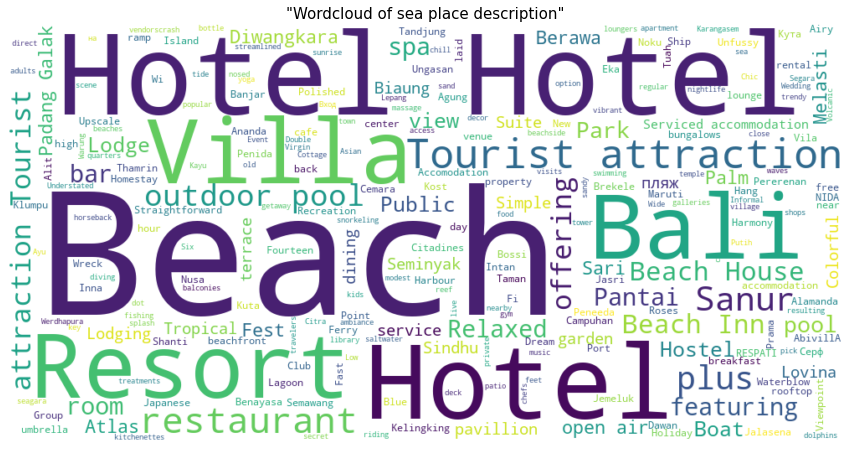

In [111]:
# wordcloud of class target sea
show_wordcloud(sea_post, 'sea')

#### *Wordcloud of buildings class*

There are 27597 words in the combination of all buildings place description.


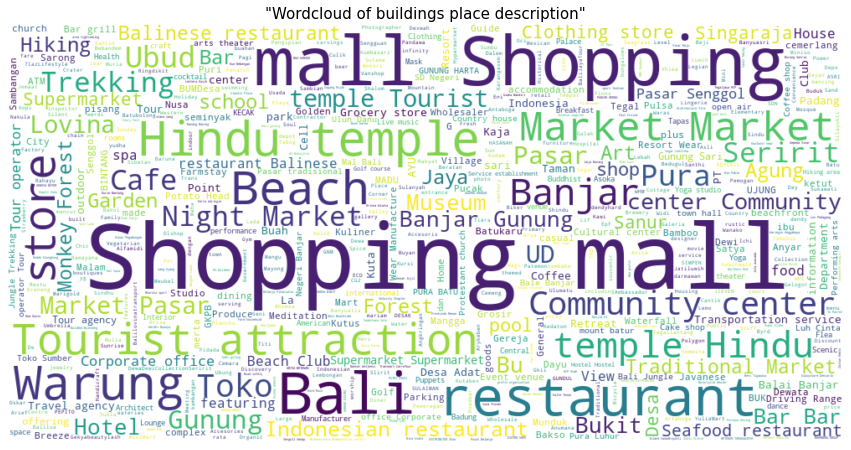

In [112]:
# wordcloud of class target buildings
show_wordcloud(buildings_post, 'buildings')

#### *Wordcloud of forest class*

There are 12827 words in the combination of all forest place description.


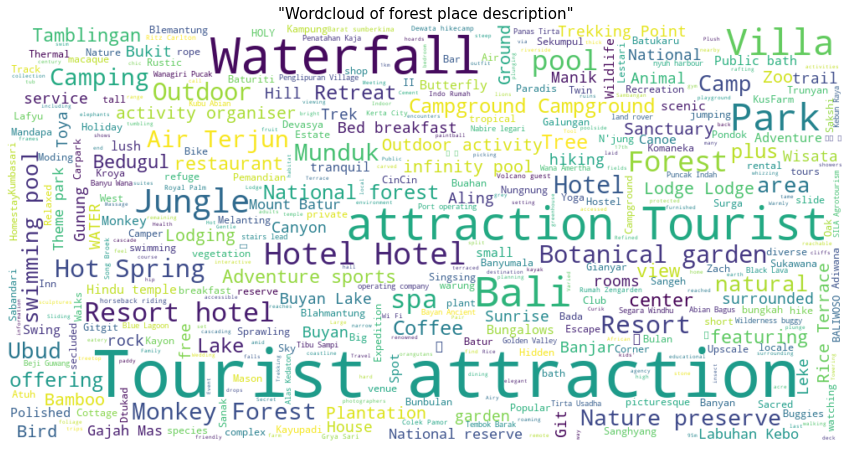

In [115]:
# wordcloud of class target forest
show_wordcloud(forest_post, 'forest')

#### *Wordcloud of mountain class*

There are 3478 words in the combination of all mountain place description.


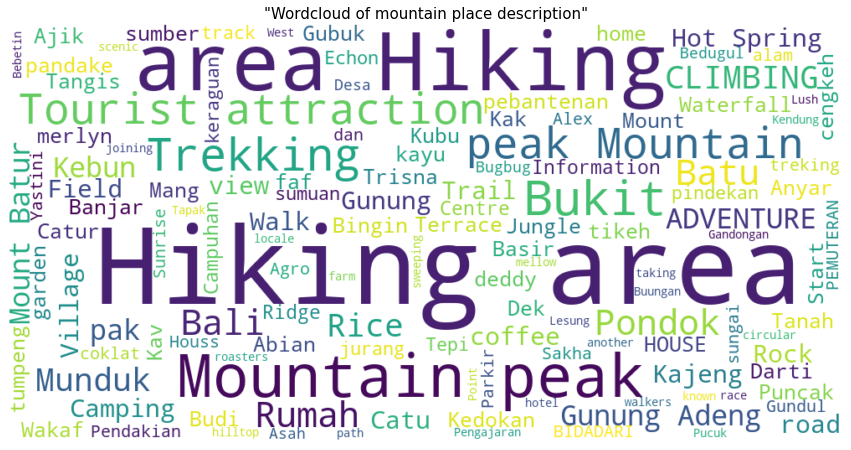

In [116]:
# wordcloud of class target mountain
show_wordcloud(mountain_post, 'mountain')

#### *Wordcloud of street class*

There are 1755 words in the combination of all street place description.


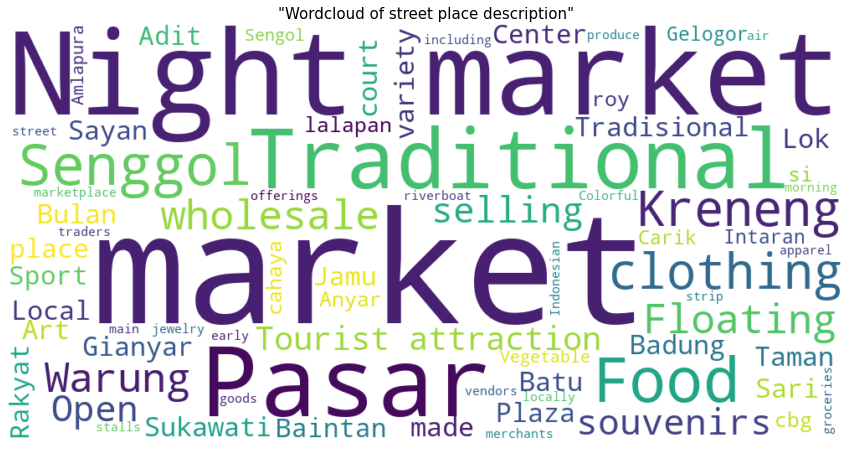

In [117]:
# wordcloud of class target street
show_wordcloud(street_post, 'street')

# Data Preprocessing

### *Get Data for Model Inference*

In [118]:
# Get Data for Model Inference

data_inf = data.sample(20, random_state = 0)

In [119]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)

In [120]:
# Reset Index

data_train_test.reset_index(drop = True, inplace = True)
data_inf.reset_index(drop = True, inplace = True)

### *Feature Selection*

We have done feature selection on text exploration, merge all object column in `text` column and define new dataframe named `datax`.

In [121]:
datax.head()

,target,text
0,Sea,Lovina Beach Beach Beach Volcanic-sand beach f...
1,Sea,Biaung Beach Beach Beach
2,Sea,Pantai Segara Ayu Beach Beach
3,Sea,Sanur Beach Beach Colorful fishing boats dot b...
4,Sea,Werdhapura Beach Beach Beach


In [212]:
# shuffling the data
datax = shuffle(datax)
datax.reset_index(inplace = True, drop = True)

### *Handling Missing Values*

In [214]:
# Check Missing Values on data
datax.isnull().sum()

target    0
text      0
dtype: int64

### *Cleaning Data*

In [215]:
# Get the Independent Features
X = datax.drop('target',axis=1)

# Get the Dependent features
y = datax['target']

In [124]:
# Function for cleaning the data
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower() # text to lower case
    text = re.sub('\[.*?\]', '', text) # dropping text in square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) # drop links
    text = re.sub('<.*?>+', '', text) # drop text in <>
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # drop punctuatuion 
    text = re.sub('\n', '', text) # drop enter / new line
    text = re.sub('\w*\d\w*', '', text)
    return text

In [217]:
# Applying clean_text function to data
uncleaned_corpus = X.copy()
uncleaned_corpus['text'] = uncleaned_corpus['text'].apply(lambda x:clean_text(x)) 

In [218]:
# Defining corpus with cleaned data
ss = SnowballStemmer(language='english') 
corpus = []
for i in range(0, len(uncleaned_corpus)):
  decsr = uncleaned_corpus['text'][i]
  decsr = decsr.split()  # splitting data
  decsr = [ss.stem(word) for word in decsr if not word in stopwords.words('english')] # steeming setiap huruf dengan pengecualian kata yang ada dalam stopwords
  decsr = ' '.join(decsr)
  corpus.append(decsr)

Why we use `SnowballSteemer` instead of using `PorterSteemer`?

```
Martin Porter (who invented the Porter Stemmer or Porter algorithm in 1980) also created Snowball Stemmer. The method utilized in this instance is more precise and is referred to as “English Stemmer” or “Porter2 Stemmer.” It is somewhat faster and more logical than the original Porter Stemmer.
```

In [219]:
# defining corpus to dataframe
X['corpus'] = corpus
X.reset_index(inplace=True)

### *Feature Encoding*

In [222]:
#defined vocabulary size 
voc_size = 400

# Encoding corpus with tf.one_hot encoder
enc_corps = [one_hot(words, voc_size) for words in corpus] 

In [223]:
# Checking len corpus and enc_corps
print(len(enc_corps[0]))
print(len(corpus[0].split(' ')))

10
10


In [224]:
# Encoding y target
y_enc = LabelEncoder().fit_transform(y)

### *Splitting Data*

In [225]:
# Split between `X` final (Features) and `y` final (Target)

X_trains, X_test, y_trains, y_test = train_test_split(X['corpus'], np.array(y_enc), test_size=0.2, random_state = 0)

### *Tokenization*

In [226]:
# Embedding corpus after encoded with equal lenght = 40
descr_length = 20 # set maximum length of all sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
vocab = tokenizer.word_index

# Only top num_words-1 most frequent words will be taken into account. Only words known by the tokenizer will be taken into account.
X_trains_word_idx = tokenizer.texts_to_sequences(X_trains) 
X_test_word_idx = tokenizer.texts_to_sequences(X_test)

# padding sequences
X_trains_padded_seqs = pad_sequences(X_trains_word_idx, maxlen = descr_length)
X_test_padded_seqs = pad_sequences(X_test_word_idx, maxlen = descr_length)

### *Define Validation Set*

In [227]:
# Mengambil data dari X_trains untuk dijadikan sebagai data validasi
X_train, X_val = X_trains_padded_seqs[:360], X_trains_padded_seqs[360:]
y_train, y_val = y_trains[:360], y_trains[360:]

# Model Defining

### *Building Pipeline*

In [228]:
# Setting Autotune
AUTOTUNE = tf.data.AUTOTUNE

#Building a pipeline from a data that exists in memory
training_batches = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1024).batch(64).cache().prefetch(AUTOTUNE)
validation_batches = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(64).cache().prefetch(AUTOTUNE)
testing_batches = tf.data.Dataset.from_tensor_slices((X_test_padded_seqs, y_test)).batch(64).cache().prefetch(AUTOTUNE)

In [230]:
# Creating model lstm only
embedding_vector_features = 100 # output dimension
model = Sequential()
model.add(Embedding(len(vocab)+1, embedding_vector_features, input_length = descr_length)) # len(vocab)+1 is an input shape, we have initialized vocab variabel in tokenization section
model.add(LSTM(100))        # model lstm with 100 output dimension
model.add(Dropout(0.3))     # dropout layers
model.add(Dense(5, activation='softmax')) # output layer

model.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics = 'accuracy')
# loss function with categorical_crossentropy because it's multiclass case

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 100)           130500    
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 505       
                                                                 
Total params: 211,405
Trainable params: 211,405
Non-trainable params: 0
_________________________________________________________________
None


# Model Training

In [241]:
# ClearSession
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Compiling model with Seq-API
model_learn = model.fit(training_batches, epochs = 100, validation_data = validation_batches)

Epoch 1/100
6/6 [==============================] - 1s 94ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7461 - val_accuracy: 0.8025
Epoch 2/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.7564 - val_accuracy: 0.8025
Epoch 3/100
6/6 [==============================] - 0s 51ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7656 - val_accuracy: 0.8025
Epoch 4/100
6/6 [==============================] - 1s 100ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.7765 - val_accuracy: 0.8025
Epoch 5/100
6/6 [==============================] - 0s 54ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.7847 - val_accuracy: 0.8025
Epoch 6/100
6/6 [==============================] - 0s 51ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.7908 - val_accuracy: 0.8025
Epoch 7/100
6/6 [==============================] - 0s 47ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.7979 - val_accuracy: 0.8025
Epoch 8/100
6/6 [==

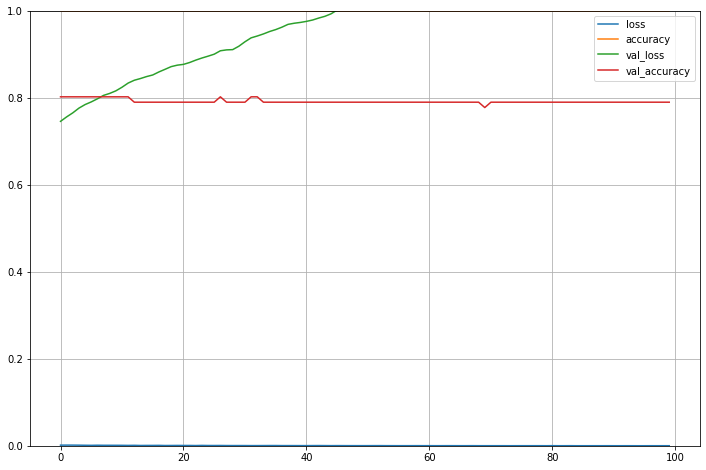

In [242]:
# Graph plot of train process model
pd.DataFrame(model_learn.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Here as we can see, the loss on validation increases and exceeds 100% loss tresshold while accuracy shows a stable movement. On training, the model seems to perform well with zero loss and 100% accuracy. The increased movement of loss on validation perhaps caused by the data size and the imbalance of class data target.

With this result, maybe there should be a way to improve the model perfomance. So, let's try model improvement.

# Model Improvement

### Defining Model Improvement

In [234]:
# creating model lstm + depths CNN
main_input = Input(shape = (descr_length, ), dtype = 'int32') # set input

# embedding
embedder = Embedding(len(vocab)+1, embedding_vector_features, input_length = descr_length)
embed = embedder(main_input)

# lstm model
lstm = LSTM(100)(embed) # inisialisasi model lstm dengan output dimension 100
lstm = Dropout(0.3)(lstm) # dropout layer

# cnn part
cnn = Conv1D(256, 5, padding='same')(embed)
cnn = MaxPooling1D(3, 3, padding='same')(cnn)
cnn = Conv1D(128, 5, padding='same')(cnn)
cnn = MaxPooling1D(3, 3, padding='same')(cnn)
cnn = Conv1D(64, 3, padding='same')(cnn)
cnn = Flatten()(cnn)
cnn = Dropout(0.1)(cnn)
cnn = BatchNormalization()(cnn)
cnn = Dense(100, activation='relu')(cnn)
cnn = Dropout(0.1)(cnn)

# concat
lstm_cnn = concatenate([lstm, cnn], axis = -1)
flat = Flatten()(lstm_cnn)  # Flattening
drop = Dropout(0.2)(flat)
main_output = Dense(5, activation='softmax')(drop)
model_imp = Model(inputs = main_input, outputs = main_output)

# compiling
model_imp.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# summary
print(model_imp.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 20, 100)      130500      ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 20, 256)      128256      ['embedding[0][0]']              
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 7, 256)       0           ['conv1d[0][0]']                 
                                                                                              

### Training Model Improvement

In [239]:
# ClearSession
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Compiling model with Seq-API
model_learn_imp = model_imp.fit(training_batches, epochs = 100, validation_data = validation_batches)

Epoch 1/100
6/6 [==============================] - 2s 145ms/step - loss: 1.6542e-04 - accuracy: 1.0000 - val_loss: 0.7020 - val_accuracy: 0.7160
Epoch 2/100
6/6 [==============================] - 0s 69ms/step - loss: 2.4389e-04 - accuracy: 1.0000 - val_loss: 0.6965 - val_accuracy: 0.7160
Epoch 3/100
6/6 [==============================] - 0s 52ms/step - loss: 2.0035e-04 - accuracy: 1.0000 - val_loss: 0.6528 - val_accuracy: 0.7284
Epoch 4/100
6/6 [==============================] - 0s 51ms/step - loss: 2.1713e-04 - accuracy: 1.0000 - val_loss: 0.6247 - val_accuracy: 0.7531
Epoch 5/100
6/6 [==============================] - 0s 52ms/step - loss: 1.2541e-04 - accuracy: 1.0000 - val_loss: 0.6104 - val_accuracy: 0.7654
Epoch 6/100
6/6 [==============================] - 0s 50ms/step - loss: 2.8204e-04 - accuracy: 1.0000 - val_loss: 0.5871 - val_accuracy: 0.7778
Epoch 7/100
6/6 [==============================] - 0s 47ms/step - loss: 2.1335e-04 - accuracy: 1.0000 - val_loss: 0.5739 - val_accuracy

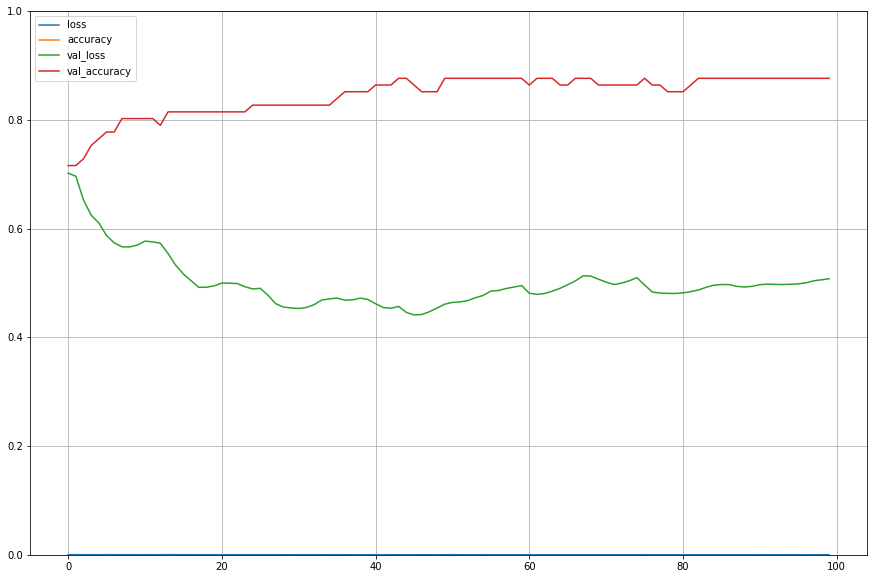

In [240]:
# Graph plot of train process model
pd.DataFrame(model_learn_imp.history).plot(figsize=(15, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

After improvement, the loss on validation appears to decrease while the accuracy increases from 0.7 to almost 0.9. Is this a good improvement, let's have a look on the classification report of both models.

# Model Evaluation

In [257]:
# Dictionary of each class
classes_dict = { 0:'Buildings',
                 1:'Forest', 
                 2:'Mountain', 
                 3:'Sea', 
                 4:'Street' }

### *Classification Report on Train Set*

In [248]:
# predicting
y_pred = model.predict(X_train)
y_pred_imp = model_imp.predict(X_train)
y_pred = np.argmax(y_pred, axis = 1)
y_pred_imp = np.argmax(y_pred_imp, axis = 1)

# Classification all models (base and improved)
print("Sequential base model evaluation: \n", classification_report(y_train, y_pred))
print('-'*55)
print("Model improvement evaluation: \n", classification_report(y_train, y_pred_imp))
print('-'*55)

12/12 [==============================] - 1s 24ms/step
Sequential base model evaluation: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        13

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360

-------------------------------------------------------
Model improvement evaluation: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        13

    acc

### *Classification Report on Test Set*

In [249]:
# predicting
y_pred_test = model.predict(X_test_padded_seqs)
y_pred_imp_test = model_imp.predict(X_test_padded_seqs)
y_pred_test = np.argmax(y_pred_test, axis = 1)
y_pred_imp_test = np.argmax(y_pred_imp_test, axis = 1)

# Classification all models (base and improved)
print("Sequential base model evaluation: \n", classification_report(y_test, y_pred_test))
print('-'*55)
print("Model improvement evaluation: \n", classification_report(y_test, y_pred_imp_test))
print('-'*55)

4/4 [==============================] - 0s 88ms/step
Sequential base model evaluation: 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        65
           1       0.82      0.75      0.78        24
           2       0.92      1.00      0.96        11
           3       0.57      0.89      0.70         9
           4       0.50      0.50      0.50         2

    accuracy                           0.85       111
   macro avg       0.74      0.80      0.76       111
weighted avg       0.86      0.85      0.85       111

-------------------------------------------------------
Model improvement evaluation: 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88        65
           1       0.76      0.79      0.78        24
           2       0.92      1.00      0.96        11
           3       0.80      0.89      0.84         9
           4       0.00      0.00      0.00         2

    accur

On training set, both models show a good performances with 100% score on all metrics. However, on training set, `f1-score` on improved model looks better than base model except for `street` class or `target` = 4 (there are only 2 data of this class on testing set). While on base model the class of `street` has one predicted correctly out of two data.

With the consideration of decreasing loss on validation, we will select the improved model for data inference.

# Model Saving

In [258]:
# Save the model in HDF5 format // to use for data inference

model_imp.save("text_classification.h5")

In [261]:
# freeze model
for layer in model_imp.layers:
  layer.trainable = False

# Save model for backend
model_imp.save("text_classification")

INFO:tensorflow:Assets written to: text_classification\assets


INFO:tensorflow:Assets written to: text_classification\assets


# Model Inference

In [259]:
# Display Inference-Set

data_inf

,name,type,subtypes,city,latitude,longitude,rating,reviews,photo,street_view,description,owner_title,target,text
0,The Balilua House Factory,Shopping mall,Shopping mall,Buleleng Regency,-8.182419,114.987824,,,https://lh5.googleusercontent.com/p/AF1QipObud...,https://lh5.googleusercontent.com/p/AF1QipObud...,,The Balilua House Factory,Buildings,The Balilua House Factory Shopping mall Shoppi...
1,Dawan Beach Inn,Hostel,Hostel,Denpasar City,-8.652714,115.213683,,,https://streetviewpixels-pa.googleapis.com/v1/...,https://streetviewpixels-pa.googleapis.com/v1/...,,Dawan Beach Inn,Sea,Dawan Beach Inn Hostel Hostel Dawan Beach Inn
2,GRIYA BETENAN TANGGUWISYA,Shopping mall,Shopping mall,Buleleng Regency,-8.197440,114.949144,5.0,2.0,https://lh5.googleusercontent.com/p/AF1QipOKnO...,https://lh5.googleusercontent.com/p/AF1QipOKnO...,,GRIYA BETENAN TANGGUWISYA,Buildings,GRIYA BETENAN TANGGUWISYA Shopping mall Shoppi...
3,Warung made sari,Shopping mall,Shopping mall,Buleleng Regency,-8.221446,114.940537,,,https://streetviewpixels-pa.googleapis.com/v1/...,https://streetviewpixels-pa.googleapis.com/v1/...,,Warung made sari,Buildings,Warung made sari Shopping mall Shopping mall ...
4,PURA PUSEH LAN DESA GUNUNG SARI,Hindu temple,Hindu temple,Klungkung Regency,-8.770453,115.523409,4.8,5.0,https://lh5.googleusercontent.com/p/AF1QipPQXl...,https://lh5.googleusercontent.com/p/AF1QipPQXl...,,PURA PUSEH LAN DESA GUNUNG SARI,Buildings,PURA PUSEH LAN DESA GUNUNG SARI Hindu temple H...
5,Bali Sun,Cafe,Cafe,Denpasar City,-8.698065,115.262973,4.5,2.0,https://lh5.googleusercontent.com/p/AF1QipMjZs...,https://lh5.googleusercontent.com/p/AF1QipMjZs...,,Bali Sun,Buildings,Bali Sun Cafe Cafe Bali Sun
6,R&R Coffee Corner,Cafe,Cafe,Buleleng Regency,-8.258927,115.066683,5.0,26.0,https://lh5.googleusercontent.com/p/AF1QipM0UP...,https://lh5.googleusercontent.com/p/AF1QipM0UP...,,R&R Coffee Corner,Buildings,R&R Coffee Corner Cafe Cafe R&R Coffee Corner
7,BUMDEsa Sulanyah,Shopping mall,Shopping mall,Buleleng Regency,-8.195635,114.941304,,,,,,BUMDEsa Sulanyah,Buildings,BUMDEsa Sulanyah Shopping mall Shopping mall ...
8,Villa Bossi at Banjar,Hotel,Hotel,Buleleng Regency,-8.183055,114.961961,5.0,5.0,https://lh5.googleusercontent.com/p/AF1QipNPwz...,https://lh5.googleusercontent.com/p/AF1QipNPwz...,,Villa Bossi at Banjar,Sea,Villa Bossi at Banjar Hotel Hotel Villa Boss...
9,Satya Bali Trekking - mount batur trekking price,Travel agency,"Travel agency, Hiking area",Gianyar Regency,-8.505403,115.254038,5.0,4.0,https://lh5.googleusercontent.com/p/AF1QipMotn...,https://lh5.googleusercontent.com/p/AF1QipMotn...,,Satya Bali Trekking - mount batur trekking price,Buildings,Satya Bali Trekking - mount batur trekking pri...


In [260]:
# feature selecting
data_inf['text'] = data_inf['name'] + ' ' + data_inf['type'] + ' ' + data_inf['subtypes'] + ' ' + data_inf['description'] + ' ' + data_inf['owner_title']
data_inf_final = data_inf[['target', 'text']]

# cleaning data
infdat = data_inf_final.drop('target', axis = 1)
infdat['text'] = infdat['text'].apply(lambda x:clean_text(x))

corpusinf = []
for i in range(0, len(infdat)):
  decsr = infdat['text'][i]
  decsr = decsr.split()  # splitting data
  decsr = [ss.stem(word) for word in decsr if not word in stopwords.words('english')] # steeming setiap huruf dengan pengecualian kata yang ada dalam stopwords
  decsr = ' '.join(decsr)
  corpusinf.append(decsr)

infdat['corpusinf'] = corpusinf
infdat.reset_index(inplace = True)

# encoding
inf_enc_corps = [one_hot(words, voc_size) for words in corpusinf]

# Tokenization
inf_word_idx = tokenizer.texts_to_sequences(infdat['corpusinf'])
inf_padded_seqs = pad_sequences(inf_word_idx, maxlen = descr_length)

# Loading model
model_ = keras.models.load_model("text_classification.h5")

# Predicting
y_pred_inf = model_.predict(inf_padded_seqs)
y_pred_inf = np.argmax(y_pred_inf, axis = 1)

# Concate between Inference-Set and Prediction
data_inf_finaldf = pd.concat([data_inf, pd.DataFrame(y_pred_inf, columns=['Prediction'])], axis=1)
data_inf_finaldf

1/1 [==============================] - 1s 1s/step


,name,type,subtypes,city,latitude,longitude,rating,reviews,photo,street_view,description,owner_title,target,text,Prediction
0,The Balilua House Factory,Shopping mall,Shopping mall,Buleleng Regency,-8.182419,114.987824,,,https://lh5.googleusercontent.com/p/AF1QipObud...,https://lh5.googleusercontent.com/p/AF1QipObud...,,The Balilua House Factory,Buildings,The Balilua House Factory Shopping mall Shoppi...,0
1,Dawan Beach Inn,Hostel,Hostel,Denpasar City,-8.652714,115.213683,,,https://streetviewpixels-pa.googleapis.com/v1/...,https://streetviewpixels-pa.googleapis.com/v1/...,,Dawan Beach Inn,Sea,Dawan Beach Inn Hostel Hostel Dawan Beach Inn,3
2,GRIYA BETENAN TANGGUWISYA,Shopping mall,Shopping mall,Buleleng Regency,-8.197440,114.949144,5.0,2.0,https://lh5.googleusercontent.com/p/AF1QipOKnO...,https://lh5.googleusercontent.com/p/AF1QipOKnO...,,GRIYA BETENAN TANGGUWISYA,Buildings,GRIYA BETENAN TANGGUWISYA Shopping mall Shoppi...,0
3,Warung made sari,Shopping mall,Shopping mall,Buleleng Regency,-8.221446,114.940537,,,https://streetviewpixels-pa.googleapis.com/v1/...,https://streetviewpixels-pa.googleapis.com/v1/...,,Warung made sari,Buildings,Warung made sari Shopping mall Shopping mall ...,0
4,PURA PUSEH LAN DESA GUNUNG SARI,Hindu temple,Hindu temple,Klungkung Regency,-8.770453,115.523409,4.8,5.0,https://lh5.googleusercontent.com/p/AF1QipPQXl...,https://lh5.googleusercontent.com/p/AF1QipPQXl...,,PURA PUSEH LAN DESA GUNUNG SARI,Buildings,PURA PUSEH LAN DESA GUNUNG SARI Hindu temple H...,0
5,Bali Sun,Cafe,Cafe,Denpasar City,-8.698065,115.262973,4.5,2.0,https://lh5.googleusercontent.com/p/AF1QipMjZs...,https://lh5.googleusercontent.com/p/AF1QipMjZs...,,Bali Sun,Buildings,Bali Sun Cafe Cafe Bali Sun,0
6,R&R Coffee Corner,Cafe,Cafe,Buleleng Regency,-8.258927,115.066683,5.0,26.0,https://lh5.googleusercontent.com/p/AF1QipM0UP...,https://lh5.googleusercontent.com/p/AF1QipM0UP...,,R&R Coffee Corner,Buildings,R&R Coffee Corner Cafe Cafe R&R Coffee Corner,0
7,BUMDEsa Sulanyah,Shopping mall,Shopping mall,Buleleng Regency,-8.195635,114.941304,,,,,,BUMDEsa Sulanyah,Buildings,BUMDEsa Sulanyah Shopping mall Shopping mall ...,0
8,Villa Bossi at Banjar,Hotel,Hotel,Buleleng Regency,-8.183055,114.961961,5.0,5.0,https://lh5.googleusercontent.com/p/AF1QipNPwz...,https://lh5.googleusercontent.com/p/AF1QipNPwz...,,Villa Bossi at Banjar,Sea,Villa Bossi at Banjar Hotel Hotel Villa Boss...,3
9,Satya Bali Trekking - mount batur trekking price,Travel agency,"Travel agency, Hiking area",Gianyar Regency,-8.505403,115.254038,5.0,4.0,https://lh5.googleusercontent.com/p/AF1QipMotn...,https://lh5.googleusercontent.com/p/AF1QipMotn...,,Satya Bali Trekking - mount batur trekking price,Buildings,Satya Bali Trekking - mount batur trekking pri...,0


For model improvement :
- We will collect more complete data (the data that we've been using for this project is scraped from google maps with many limitations), or collaborating with the local goverment to get more detailed information about the tourist attraction.